<a href="https://colab.research.google.com/github/jubayerij001-a11y/My-Project/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0], sep=';')
df.head()

Saving cardio_train (1).csv to cardio_train (1).csv


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [6]:
df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [7]:
df = df.dropna()

In [8]:
df = df.drop_duplicates()

In [9]:
df = pd.get_dummies(df, drop_first=True)

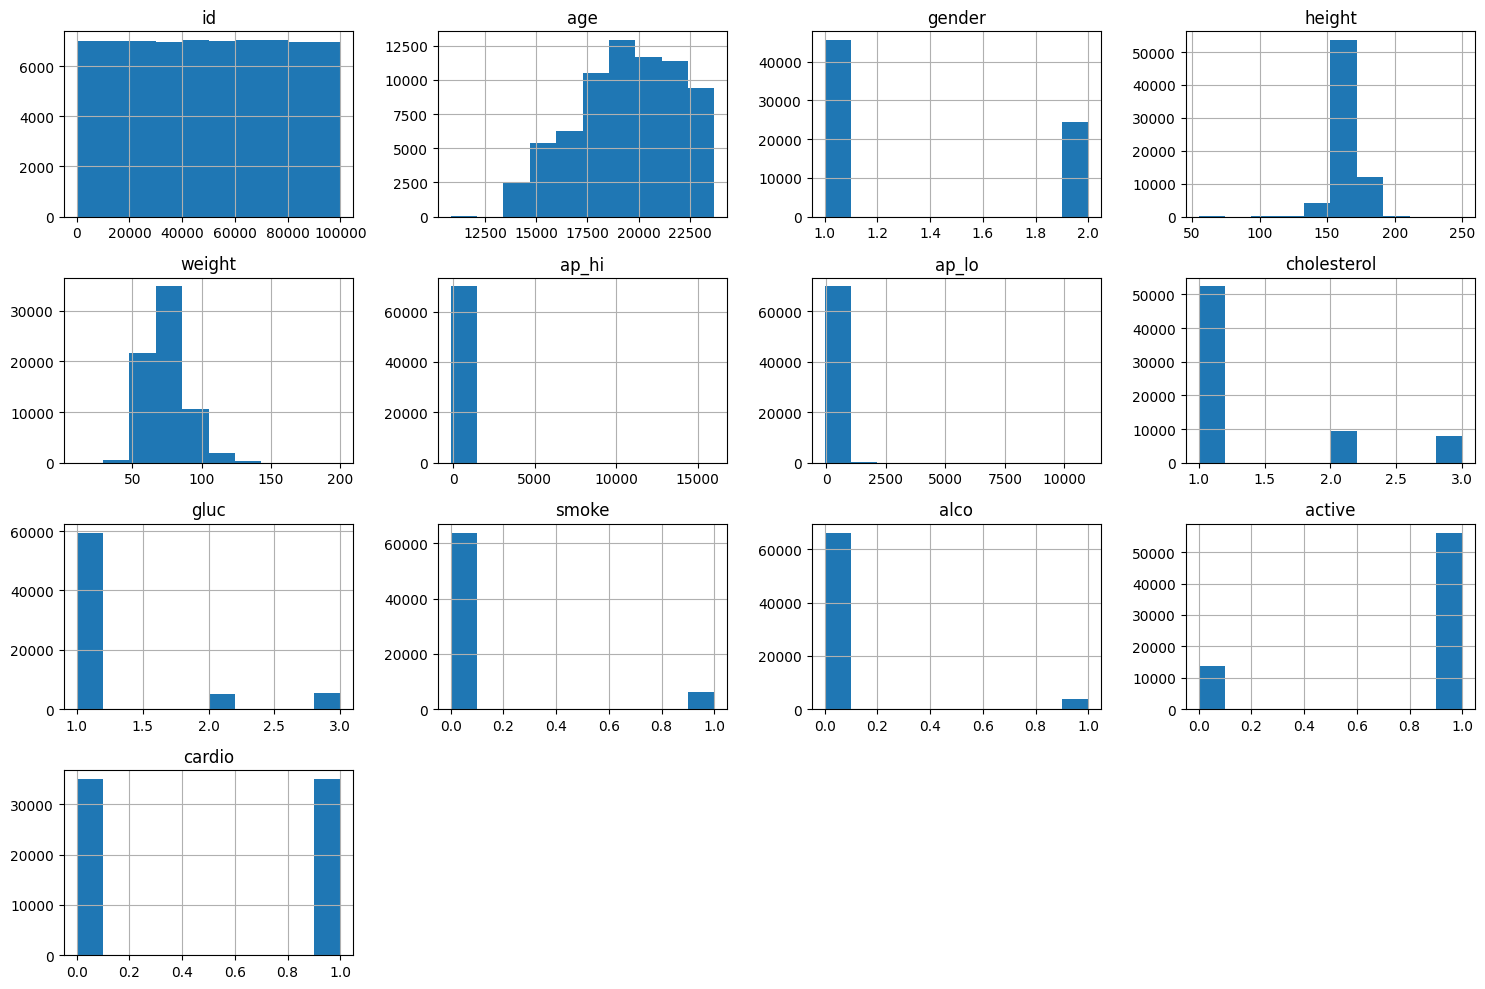

In [10]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

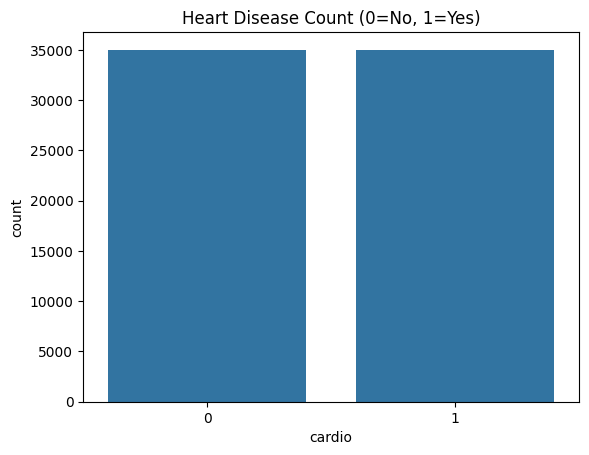

In [11]:
sns.countplot(x='cardio', data=df)
plt.title("Heart Disease Count (0=No, 1=Yes)")
plt.show()

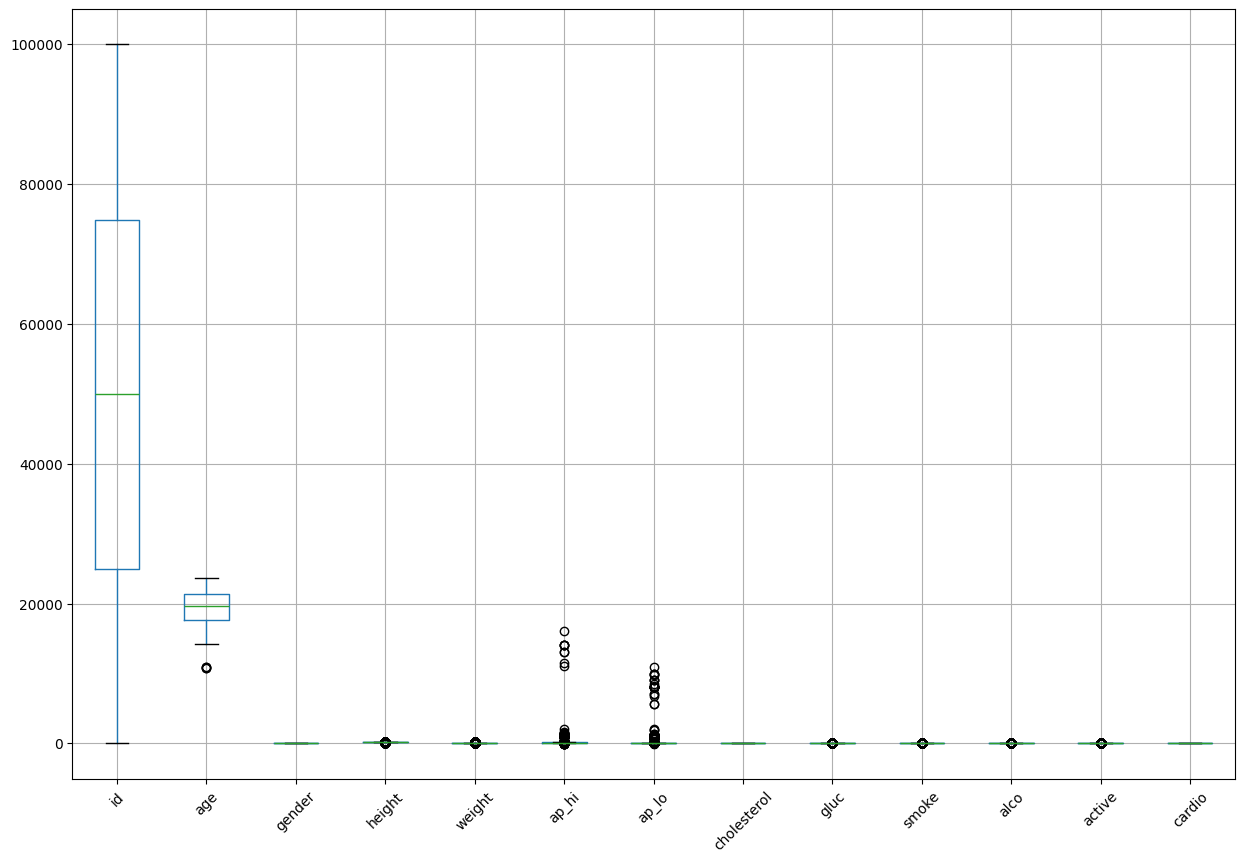

In [12]:
plt.figure(figsize=(15,10))
df.boxplot()
plt.xticks(rotation=45)
plt.show()

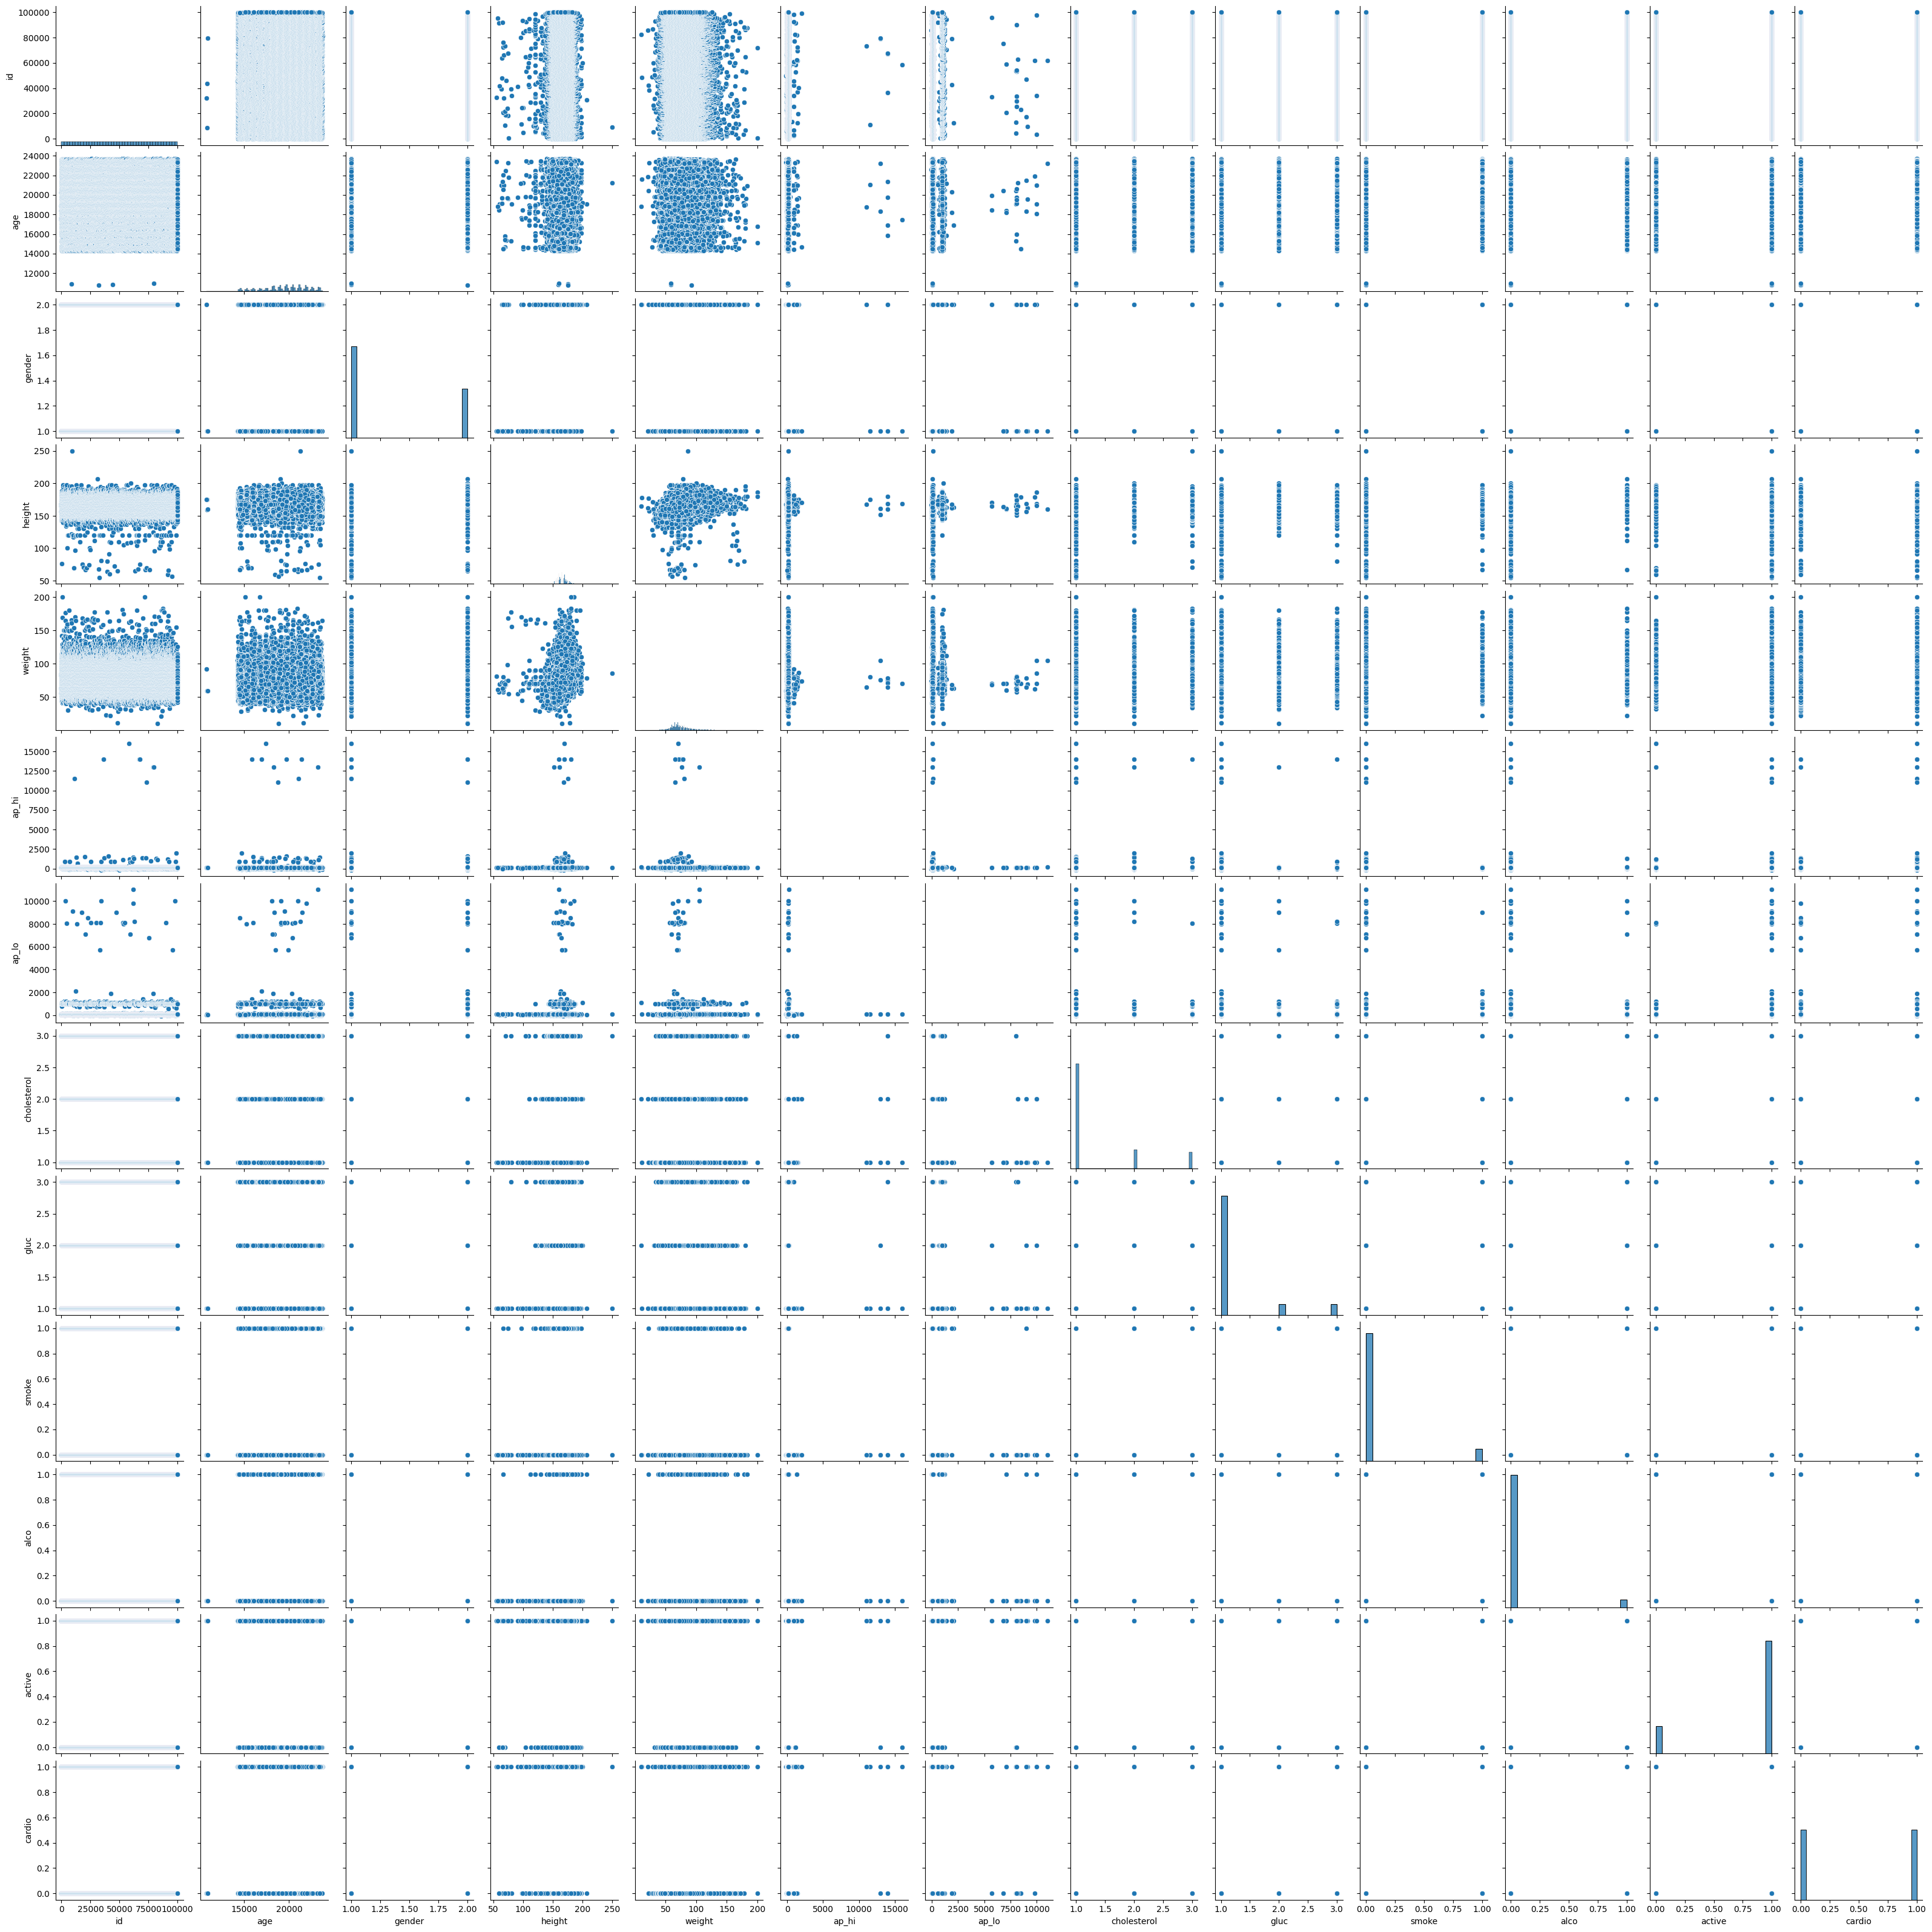

In [13]:
numeric_df = df.select_dtypes(include='number')
sns.pairplot(numeric_df)
plt.show()


In [14]:
X = df.drop('cardio', axis=1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

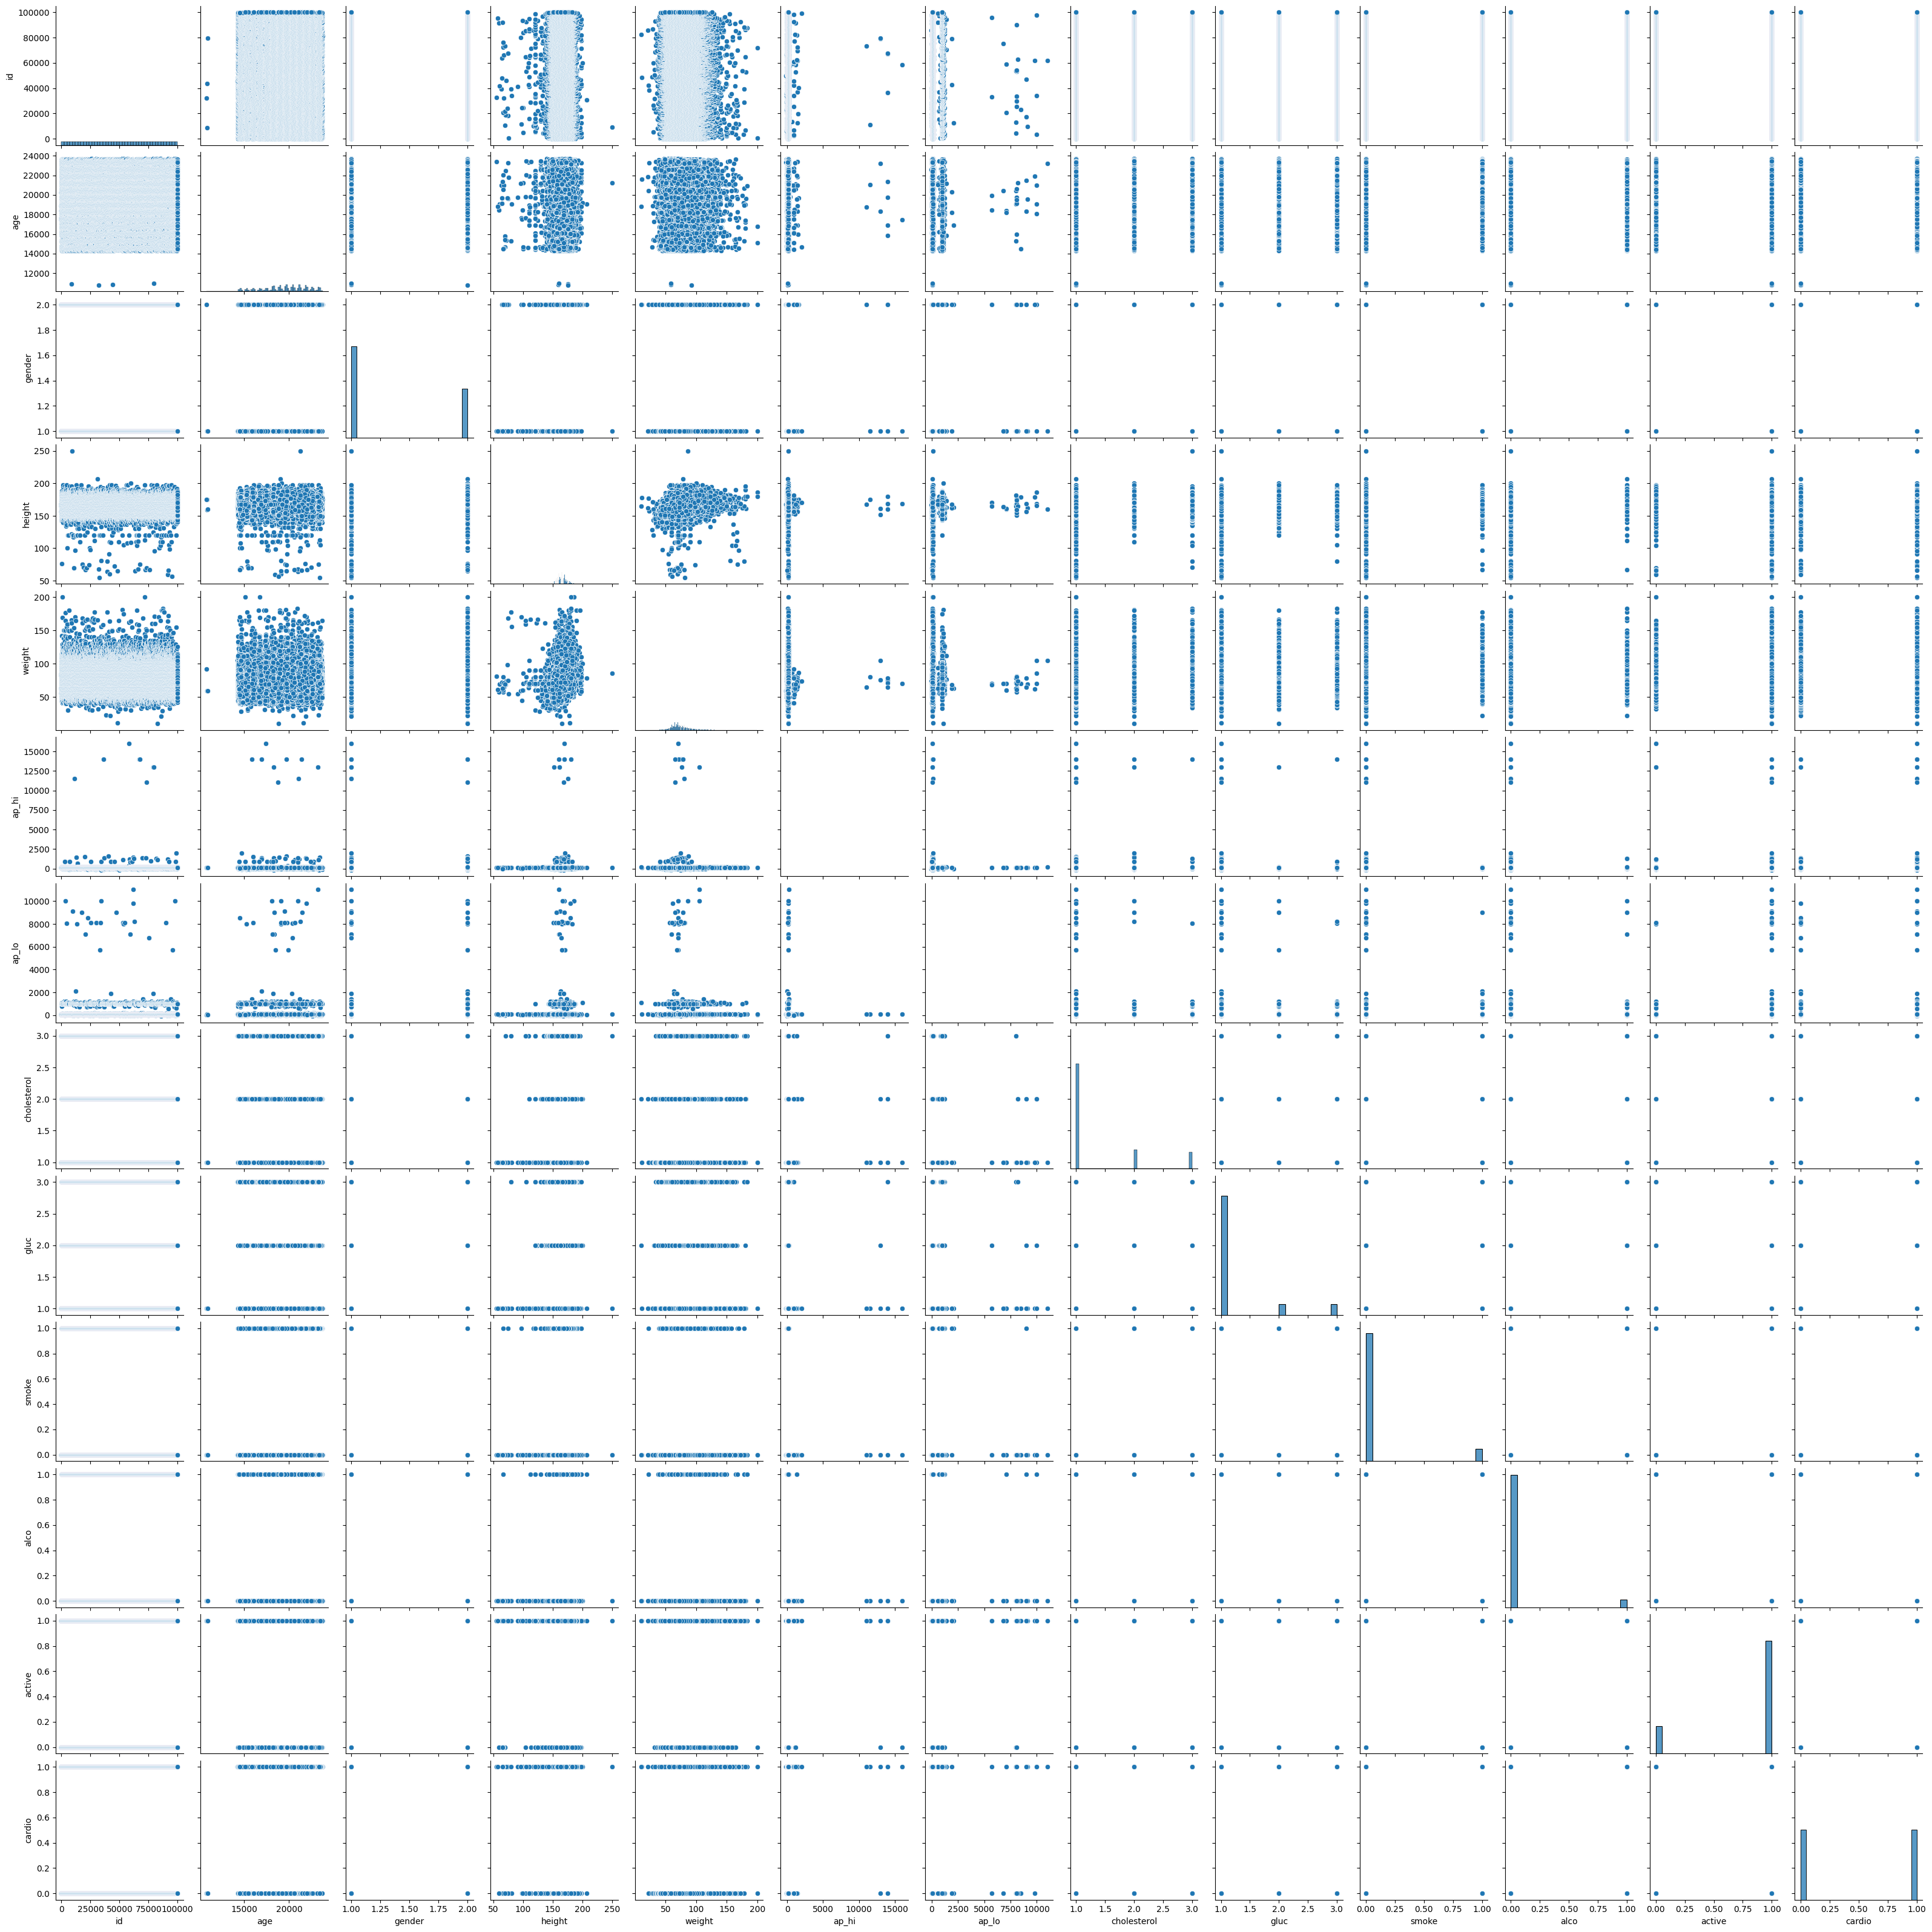

In [16]:
numeric_df = df.select_dtypes(include='number')
sns.pairplot(numeric_df)
plt.show()

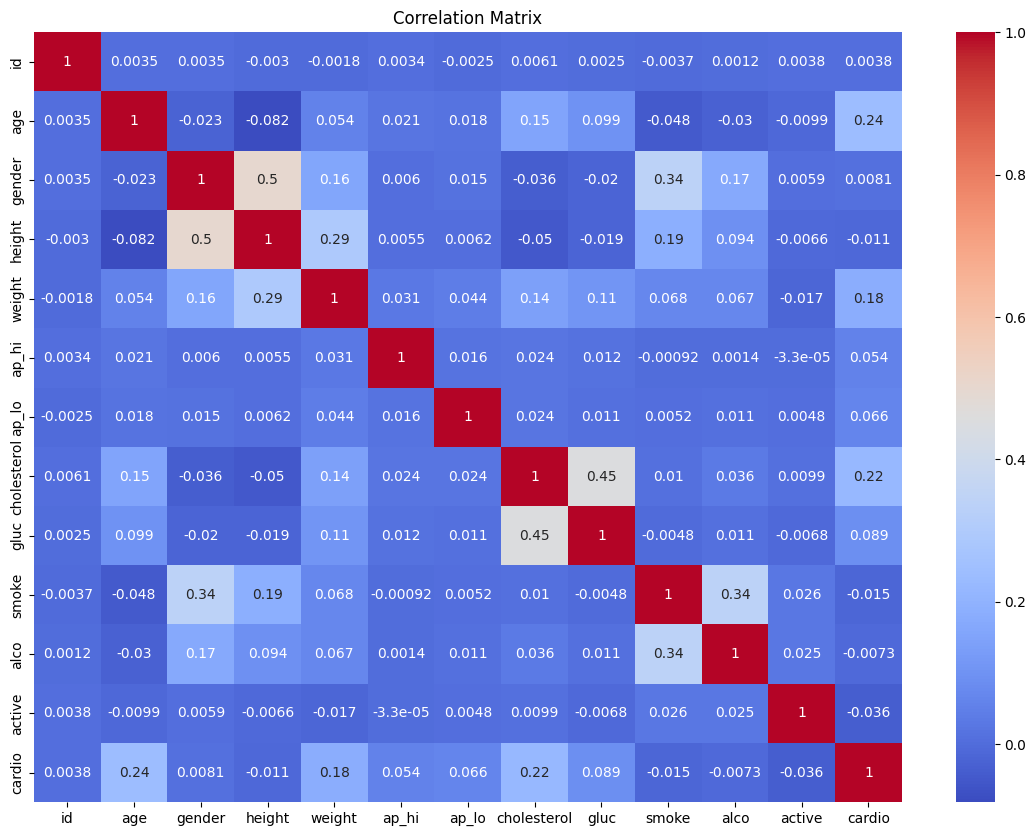

In [17]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [19]:
X = df.drop('cardio', axis=1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)


In [22]:
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)


In [23]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)


In [24]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)


In [25]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)


In [26]:
accuracy_scores = {
    "Logistic Regression": lr_acc,
    "SVM": svm_acc,
    "KNN": knn_acc,
    "Decision Tree": dt_acc,
    "Random Forest": rf_acc,
}

for model, acc in accuracy_scores.items():
    print(model, ":", acc)


Logistic Regression : 0.7233571428571428
SVM : 0.7298571428571429
KNN : 0.6278571428571429
Decision Tree : 0.6323571428571428
Random Forest : 0.7255


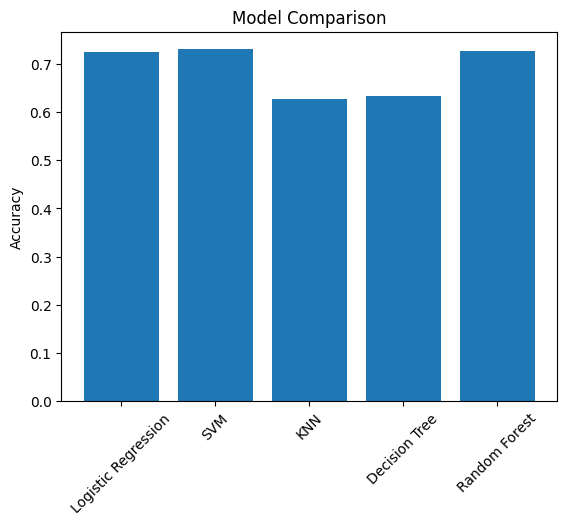

In [27]:
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()


In [34]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')

    results.append([name, accuracy, precision, recall, f1])

df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
df_results


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.723357,0.725148,0.723357,0.722840
1,SVM,0.729857,0.730867,0.729857,0.729585
2,KNN,0.627857,0.627944,0.627857,0.627812
3,Decision Tree,0.636143,0.636151,0.636143,0.636129
4,Random Forest,0.725071,0.725623,0.725071,0.724922


In [35]:
df_results.sort_values(by="Accuracy", ascending=False)


,Model,Accuracy,Precision,Recall,F1 Score
1,SVM,0.729857,0.730867,0.729857,0.729585
4,Random Forest,0.725071,0.725623,0.725071,0.724922
0,Logistic Regression,0.723357,0.725148,0.723357,0.722840
3,Decision Tree,0.636143,0.636151,0.636143,0.636129
2,KNN,0.627857,0.627944,0.627857,0.627812


In [36]:
best_model_name = df_results.sort_values("Accuracy", ascending=False).iloc[0]["Model"]
best_model_name


'SVM'

In [37]:
final_pred = best_model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, final_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      6988
           1       0.74      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



In [38]:
sample = X_test[0].reshape(1, -1)
prediction = best_model.predict(sample)

print("Prediction:", "Heart Disease" if prediction[0] == 1 else "No Heart Disease")


Prediction: Heart Disease
